In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [4]:
import scipy.sparse.linalg as SA
import scipy.sparse as S

In [108]:
def V(r, f = 1e-1):
    """
    Coulomb potential between two unit charges of same sign in units of Hartree, 
    if r is in bohr radii.  The parameter smoothes the divergence of the potential in 1D."""
    return 1 / (f + abs(r))

In [109]:
def build_H2(grid, ions = []):
    dx = grid[1] - grid[0]
    size = len(grid)
    
    x1, x2 = np.meshgrid(grid, grid)
    v = V(x1 - x2)
    for Z, k in ions:
        v += -Z * (V(x1 - k) + V(x2 - k))
    
    units = 0.5 # Ha = h_bar²/2m_e / r_0²
    o = units / dx**2 * np.ones(size ** 2)
    H = np.diag(4 * o + v.flat, 0) + \
        - np.diag(o[1:], -1) \
        - np.diag(o[1:], +1) \
        - np.diag(o[n:], -n) \
        - np.diag(o[n:], +n)
    
    for i in range(n - 1, n**2 - 1, n):
        H[i, i + 1] = 0
        H[i + 1, i] = 0
    
    return H

In [110]:
def solve(H):
    e, v = LA.eigh(H)
    v = v[:, np.argsort(e)]
    e = e[np.argsort(e)]
    return e, v

In [111]:
def solve2d(H):
    e, v = solve(H)
    n = int(np.sqrt(len(e)))
    return e, v.T.reshape(-1, n, n)

In [117]:
n = 52
x = np.linspace(-5, 5, n)
H0 = build_H2(x)
H1 = build_H2(x, [(2, 0.0)])
H2 = build_H2(x, [(1, 0.5), (1, -0.5)])

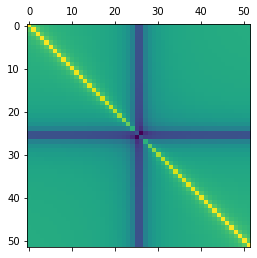

In [118]:
plt.matshow(np.diag(H1).reshape(n, n))

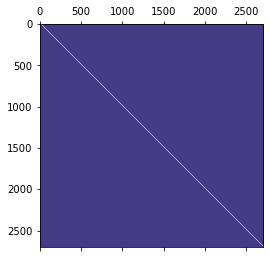

In [119]:
plt.matshow(H0)

In [120]:
e1, v1 = solve2d(H1)

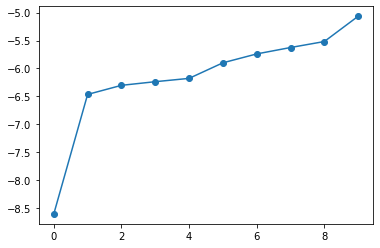

In [121]:
plt.plot(e1[:10], "-o")

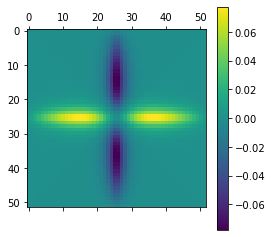

In [122]:
plt.matshow(v1[3])
plt.colorbar()

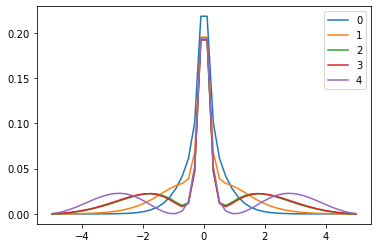

In [105]:
for i in range(5):
    plt.plot(x, (abs(v1[i])**2).sum(axis = 0),
             label = i)
plt.legend()